# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4
### Assigned November 14 - Due November 24
### Late Penalty: 5%/day

* To compete this assignment, produce ALL relevant code for each of the questions. You can answer the questions in a Notebook or by creating a .py file. 

* ALL CODE MUST BE THOROUGHLY DOCUMENTED! You can use Notebook Markup or comments, but you must be detailed in your explanations of your code. Feel free to provide an explanation for your approach to solving a problem. 

* For each question, try to use the most efficient code you can to produce each response, unless otherwise specified. 

* All relevant files must be uploaded to a git repository that is shared with me (user: SMEmrich) in order for the assignment to be considered submitted. Please be sure to put all files in a separate folder (e.g., /PS2/ProblemSet2.ipynb)

* Please avoid using ChatGPT, CoPilot or any other AI assistance to complete this assignment. If you do end up using it, please explain in your comment/Markdown notes where you got stuck, describe the code that was produced, and explain how the solution got around what you coudn't figure out


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%


## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [8]:
import numpy as np
import pandas as pd 

all_data = [] # creates an empty list that will have the participant's trial number, conditions, and reaction times appended to it

for participant in range(1,41): # creates a for loop that will loop through 40 times 
    condition = np.concatenate((np.repeat("congruent", 50), np.repeat("incongruent", 50))) 
    # creates the congruent and incongruent conditions, repeats the congruent and incongruent label 50 times and then combines them into one array
    
    congruent = np.random.normal(520, 70, 50) # generates a normal distribution of 50 congruent reaction times with a mean of 50 and a standard deviation of 70
    incongruent = np.random.normal(610, 70, 50) # does the same thing but for incongruent reaction times

    noise = np.random.uniform(-20, 20, 50) # creates a uniform distribution of noise ranging from +/-20 50 times

    congruent_noise = congruent + noise # adds the noise to the congruent reaction times 
    incongruent_noise = incongruent + noise # adds the noise to the incongruent reaction times

    rt = np.concatenate((congruent_noise, incongruent_noise)) # combines the congruent and incongruent reaction times into one array

    participants = np.repeat(participant, 50*2) # repeats the participant number 100 times 

    data = pd.DataFrame({ # create a data frame of a dictionary consisting of the following columns participants, conditions, and reaction times
    'participant': participants,
    "condition": condition,
    "rt": rt
    })

    all_data.append(data) # appends the data to the list called all_data
    
df_combined = pd.concat(all_data) # need to combine all of the data into one dataframe so we use the pd.concat function

df_combined


,participant,condition,rt
0,1,congruent,561.544808
1,1,congruent,505.028915
2,1,congruent,664.290558
3,1,congruent,563.200551
4,1,congruent,619.377835
...,...,...,...
95,40,incongruent,724.875034
96,40,incongruent,630.777125
97,40,incongruent,602.753603
98,40,incongruent,621.939602


In [9]:
df_combined.head(10) # displays the first ten rows

,participant,condition,rt
0,1,congruent,561.544808
1,1,congruent,505.028915
2,1,congruent,664.290558
3,1,congruent,563.200551
4,1,congruent,619.377835
5,1,congruent,519.999820
6,1,congruent,535.349480
7,1,congruent,522.643325
8,1,congruent,630.789176
9,1,congruent,386.958981


In [10]:
df_combined['rt'].describe() # provides the summary statistics 

count    4000.000000
mean      565.063261
std        84.410375
min       296.148703
25%       508.690220
50%       565.166912
75%       623.784133
max       852.182587
Name: rt, dtype: float64


## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [11]:
df_cleaned = df_combined[(df_combined['rt'] > 300) & (df_combined['rt'] < 800)] # using a boolean mask to index the dataframe. Essentially when reaction times are greater than 150, but less than 1500 we keep them in the dataframe. 

In [12]:
print(len(df_combined) - len(df_cleaned)) # subtracts the length of df_combined from the length of df_cleaned to provide the number of outliers removed

7


In [13]:
by_participant = df_cleaned.groupby(["participant", "condition"])["rt"].mean().reset_index()

by_participant

,participant,condition,rt
0,1,congruent,515.521435
1,1,incongruent,607.065645
2,2,congruent,514.390227
3,2,incongruent,634.990468
4,3,congruent,518.742009
...,...,...,...
75,38,incongruent,620.857939
76,39,congruent,528.588692
77,39,incongruent,602.913506
78,40,congruent,529.248842


Group data by participant and condition. Return the mean reaction time for each participant and condition. Based on what pandas says reset_index resets the index of the dataframe and uses the default instead.

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.


1.

In [14]:
mean_congruent= by_participant[by_participant['condition'] == 'congruent']["rt"].mean() # We use a boolean mask to only include rows that are in the congruent condition and then we calculate mean reaction time of these rows.

In [15]:
print(mean_congruent)

519.0040006072356


In [16]:
mean_incongruent= by_participant[by_participant['condition'] == 'incongruent']["rt"].mean() # using a boolean mask to keep only rows containing incongruent trials. Then, of the incongruent trials we then calculate the mean reaction time.

In [17]:
print(mean_incongruent)

610.7957660038921


2.

In [18]:
accuracy = [] # creates an empty list that will be filled with 1s and 0s 

for x in range(1, 81): # creates a for loop that loops through 80 times adding either 1s or 0s
    show_target = np.random.random() < 0.8 # makes it so there is an 80% chance that show target will be present. This is done to ensure that there is an 80% chance that the accuracy column gets assigned a value of 1 or a 20% chance of a 0

    if show_target == True: # if show_target is present then append a value of 1 to the accuracy list
        accuracy.append(1)
    elif show_target == False: # if show_target is absent then append a value of 0 to the accuracy list
        accuracy.append(0)

by_participant.loc[:,'accuracy'] = accuracy # appends the accuracy column to our df_cleaned dataframe

In [70]:
by_participant

,participant,condition,rt,accuracy
0,1,congruent,515.521435,1
1,1,incongruent,607.065645,1
2,2,congruent,514.390227,1
3,2,incongruent,634.990468,1
4,3,congruent,518.742009,1
...,...,...,...,...
75,38,incongruent,620.857939,1
76,39,congruent,528.588692,1
77,39,incongruent,602.913506,1
78,40,congruent,529.248842,1


3.

In [19]:
only_correct = by_participant[by_participant['accuracy'] == 1] # Used a boolean mask to filter out any rows that don't have an accuracy of 1.

In [20]:
by_condition = only_correct.groupby(['condition', 'accuracy'])['rt'].mean() #groups by condition and accuracy and then calculates the mean reaction time for the congruent correct responses and incongruent correct responses.

In [21]:
by_condition

condition    accuracy
congruent    1           518.695555
incongruent  1           610.849159
Name: rt, dtype: float64

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)


In [17]:
import matplotlib.pyplot as plt

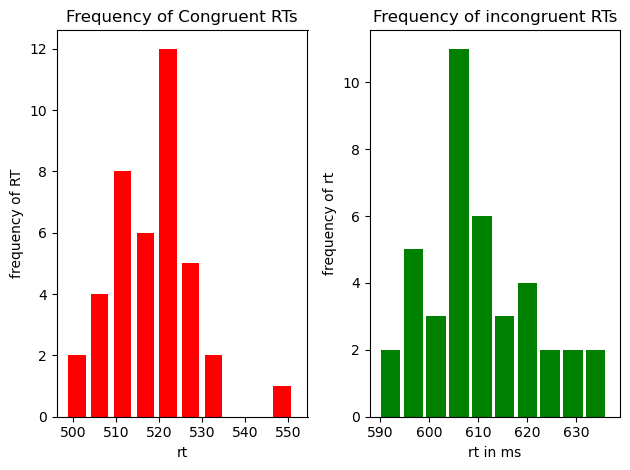

In [69]:
con = by_participant[by_participant['condition'] == 'congruent']["rt"]
incon = by_participant[by_participant['condition'] == 'incongruent']["rt"]
# create two boolean masks. One that filters out all incongruent reaction times and another that filters out all congruent reaction times

fig = plt.figure() # plots the blank figure 

axes1 = fig.add_subplot(1,2,1) #adds the subplot that will consist of 1 row and 2 columns. Axes1 will be subplot 1
axes2 = fig.add_subplot(1,2,2) #adds the second subplot 

axes1.set_ylabel('frequency of RT') # y-label
axes1.set_xlabel('rt') # x-label 
axes1.set_title("Frequency of Congruent RTs") # creates a title 
axes1.hist(con, color = "red", width = 4.0) # creates the histogram for subplot 1, changes the color to red and the width of the bars

axes2.set_ylabel('frequency of rt') # y-label
axes2.set_xlabel('rt in ms') # x-label
axes2.set_title("Frequency of incongruent RTs") # creates a title 
axes2.hist(incon, color = "green", width = 4.0) # creates the histogram for subplot 2, changes the color to green and the width of the bars

fig.tight_layout() # adjusts spacing of the plots

Text(0.5, 1.0, 'Mean Reaction Times for Congruent and Incongruent Conditions')

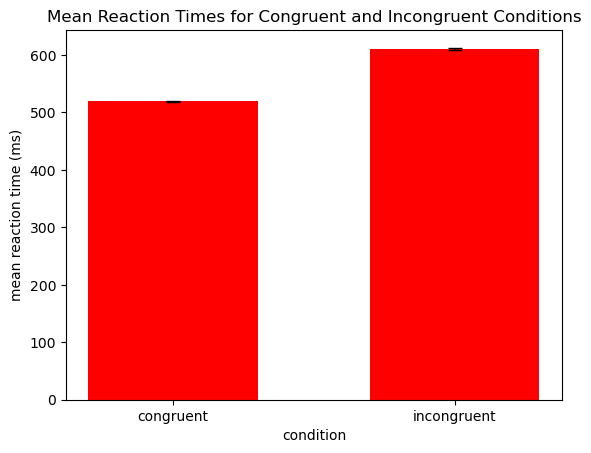

In [71]:
con = by_participant[by_participant['condition'] == 'congruent']["rt"] # creates a boolean mask that keeps only congruent reaction times for con 
incon = by_participant[by_participant['condition'] == 'incongruent']["rt"] # creates a boolean mask that keeps only incongruent reaction times for incon

mean_cons = con.mean() # calculate the mean congruent reaction times 
mean_incons = incon.mean() # calculate the mean incongruent reaction times 

fig, ax = plt.subplots() # I think this plots the blank figure along with the axes?
condition = ["congruent", "incongruent"] # create a condition list 
count = [mean_cons, mean_incons] # create a list for mean reaction times 

std_cons = con.std() # calculate the standard deviation of congruent reaction times 
std_incons = incon.std() # calculate the standard deviation of incongruent reaction times 

se_con = std_cons/np.sqrt(len(con)) # calculating the standard error of congruent reaction times 
se_incon = std_incons/np.sqrt(len(incon)) # calculating the standard error of incongruent reaction times 

se = [se_con, se_incon] # create a list of congruent and incongruent standard error 

ax.bar(condition,count, yerr = se, color = "red", width = 0.6, capsize = 5) #plots the bar graph with error bars. Also, changes the color of the bars,the width of the bars, and the size of the error bars
ax.set_ylabel("mean reaction time (ms)") # creates a y-label
ax.set_xlabel("condition") # creates a x-label
ax.set_title("Mean Reaction Times for Congruent and Incongruent Conditions") # creates a title 

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


<Axes: xlabel='condition', ylabel='rt'>

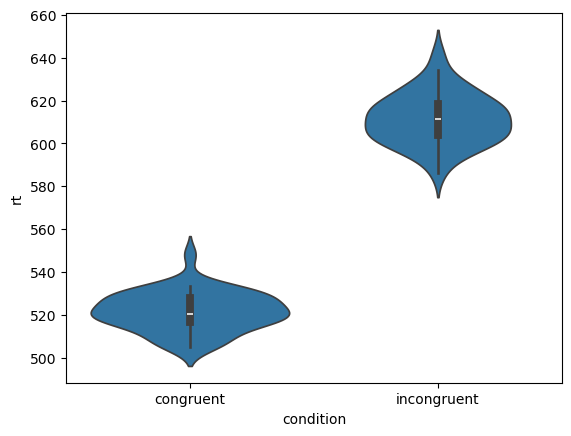

In [137]:
import seaborn as sns 

sns.violinplot(data = by_participant, x = "condition", y = "rt") # creates a violin plot with condition on the x-axis and reaction time on the y-axis 

<Axes: xlabel='condition', ylabel='rt'>

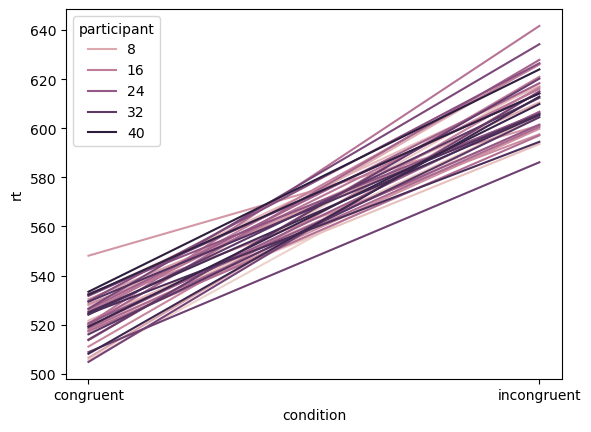

In [138]:
sns.lineplot(data = by_participant, x = "condition", y = "rt", hue = "participant") # creates a line plot with condition on the x-axis and reaction time on the y-axis. Additionally hue is used to separate each line into a single participant.


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


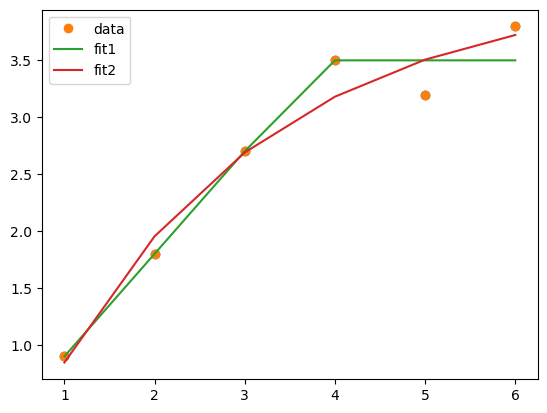

In [73]:
loads = np.array([1, 2, 3, 4, 5, 6]) # x-values of the graph 
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939]) # y-values of the graph 

plt.plot(loads, k, "o") # plotting the original graph without any curve fitting 

# **** required assistance from chatgpt as I was unable to get the first model to fit. Additionally, received a tip on looping from Dr. Emrich 
def model_one(x, a, b, k_break): # defining the first model for curve fitting 
    y = [] # empty y-variable that will be filled with values once it has finis
    for load in x: # loops through each value of x. In this case we will be inputting loads, thus it will loop through each value of loads 
        if load <= k_break: # when load is less or equal to k_break we will use the linear growth stage part of the model 
            y.append(a * load + b) # appends the value to our empty list 
        else: 
            y.append(a * k_break + b) # when load is greater than k_break we will use the flat stage of the model and it will be appended to the empty y-list
    return np.array(y) # converts the list into a numpy array 


def model_two(x, a, b, c): # defining the second model for curve fitting 
    y = a * (1 - np.exp(-b * x)) + c # use the exponential model for curve fitting 
    return y # return the values of y 


parameters, covariance = curve_fit(model_one, loads, k) # curve fit is a function that tries to find the best values of a, b, and k_break to fit our data using non-linear least squares
parameter_two, covariance_two = curve_fit(model_two, loads, k) # this is doing the same thing as previously mentioned but for the second model

fit_A, fit_B, fit_C = parameters # I believe these are the optimized values of a, b, and k_break
fit_D, fit_E, fit_F = parameter_two # I believe these are the the optimized values of a and b, and c for model_two 


fit_y = model_one(loads, fit_A, fit_B, fit_C) # we are seeing how well our fit equation matches our data. Calculate values of y using our x-values, along with the fit values of a, b, and k_break
fit_y_two = model_two(loads, fit_D, fit_E, fit_F) # we are doing the same thing as mentioned above 

plt.plot(loads, k, "o", label="data") # plotting the original graph without any curve fitting 
plt.plot(loads, fit_y, "-", label="fit1") # plotting the curve fit from model one 
plt.plot(loads, fit_y_two, "-", label = "fit2") # plotting the second curve fit from model two
plt.legend() # creates a legend to distinguish the fits and the data points 